# Hypothesis Testing

In [1]:
from scipy.stats import t

# Set the t-value and degrees of freedom
t_value = -5.25
df = 58  # Replace this with your specific degrees of freedom

# Calculate the CDF value
cdf_value = t.cdf(t_value, df)
print(cdf_value*2)


2.256369746933224e-06


In [2]:
# The Shapiro-Wilk test returns two values: the test statistic (W) and the 
#                                                                      p-value.
# If the p-value is greater than your chosen significance level (α = 0.05),
# you can assume the data comes from a normally distributed population.
# If the p-value is less than or equal to the significance level, the normality
#                                                         assumption is not met,
# and you should consider applying a data transformation or using a 
#                             non-parametric test like the Mann-Whitney U test.


from scipy.stats import shapiro

# Input the data as lists
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 
                 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 
                19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

# Perform the Shapiro-Wilk test for both desktop and mobile users
shapiro_desktop = shapiro(desktop_users)
shapiro_mobile = shapiro(mobile_users)

print("Shapiro-Wilk test for desktop users:", shapiro_desktop)
print("Shapiro-Wilk test for mobile users:", shapiro_mobile)


Shapiro-Wilk test for desktop users: ShapiroResult(statistic=0.9783114194869995, pvalue=0.7790969014167786)
Shapiro-Wilk test for mobile users: ShapiroResult(statistic=0.9714356064796448, pvalue=0.5791608691215515)


In [3]:
# If the p-value from Levene's test is greater than your chosen significance 
#                             level (α = 0.05), you can assume equal variances
#  If the p-value is less than or equal to the significance level, the 
#                                    assumption of equal variances is not met,
# and you should consider using Welch's t-test instead of the regular 
#                                                independent two-sample t-test.

from scipy.stats import levene

# Input the data as lists
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 
                 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14,
                19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

# Perform Levene's test
levene_test = levene(desktop_users, mobile_users)
print(levene_test)


LeveneResult(statistic=2.94395488191752, pvalue=0.09153720526741761)


In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

before = np.array([80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91])
after = np.array([78, 93, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88])


In [5]:
differences = after - before

In [6]:
differences

array([-2,  1,  6, -1,  3, -2,  1,  1, -1,  0,  1, -3, -2,  2, -3])

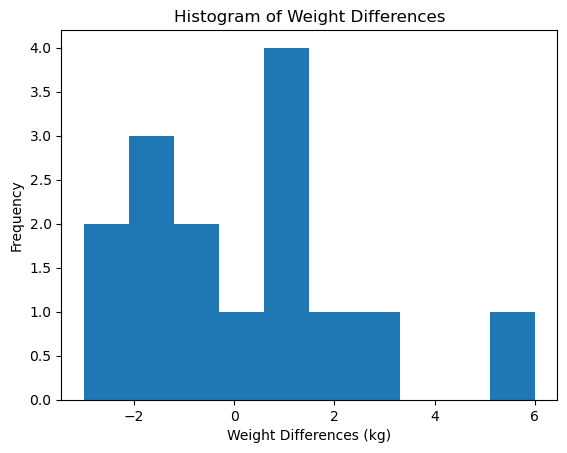

Shapiro-Wilk test: ShapiroResult(statistic=0.9220570921897888, pvalue=0.20704729855060577)


In [7]:
plt.hist(differences)
plt.title("Histogram of Weight Differences")
plt.xlabel("Weight Differences (kg)")
plt.ylabel("Frequency")
plt.show()

shapiro_test = stats.shapiro(differences)
print("Shapiro-Wilk test:", shapiro_test)


In [8]:
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)

In [9]:
n = len(differences)
t_statistic = mean_diff / (std_diff / np.sqrt(n))
df = n - 1

In [10]:
t_statistic

0.10482848367219182

In [11]:
alpha = 0.05
p_value = stats.t.cdf(t_statistic, df)

In [12]:
p_value

0.5410005146857456

# SINGLE sample t-test

In [16]:
import pandas as pd

In [17]:
train = pd.read_csv('train.csv').drop(columns=['Survived'])
test = pd.read_csv('test.csv')

In [18]:
final_df = pd.concat([train,test]).sample(1309)

In [19]:
pop = final_df['Age'].dropna()

In [20]:
pop.mean()

29.881137667304014

In [21]:
sample_age = pop.sample(25).values

In [22]:
sample_age

array([25. , 16. , 30. , 39. , 31. , 35. , 21. , 56. , 32. , 52. , 44. ,
       23. , 51. , 32. , 29. , 38. , 29. , 25. , 26. , 24. , 40. , 21. ,
       40. , 11. , 14.5])

In [23]:
# H0 -> The mean age is 35
# H1 -> The mean is less than 35

In [24]:
# check for normality using Shapiro Wilk test
from scipy.stats import shapiro

shapiro_age = shapiro(sample_age)

print(shapiro_age)

ShapiroResult(statistic=0.9719944596290588, pvalue=0.6959118247032166)


In [25]:
pop_mean = 35

In [26]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_1samp(sample_age, pop_mean)

print("t-statistic:", t_statistic)
print("p-value:", p_value/2)

t-statistic: -1.5576461341440755
p-value: 0.06620360466972744


In [27]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Fail to reject the null hypothesis.


# 2- Sample t-test

In [29]:
pop_male = final_df[final_df['Sex'] == 'male']['Age'].dropna()
pop_female = final_df[final_df['Sex'] == 'female']['Age'].dropna()

In [30]:
pop_female

747    30.0
345    24.0
504    16.0
68     17.0
763    36.0
       ... 
237     8.0
328    31.0
446    13.0
4      22.0
880    25.0
Name: Age, Length: 388, dtype: float64

In [31]:
sample_male = pop_male.sample(25)
sample_female = pop_female.sample(25)

alpha = 0.05

In [32]:
# H0 - Mean age of male and female are similar
# H1 - Mean age of male is higher than female

In [33]:
pop_male.mean()

30.58522796352584

In [34]:
pop_female.mean()

28.68708762886598

In [35]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for both desktop and mobile users
shapiro_male = shapiro(sample_male)
shapiro_female = shapiro(sample_female)

print("Shapiro-Wilk test for desktop users:", shapiro_male)
print("Shapiro-Wilk test for mobile users:", shapiro_female)

Shapiro-Wilk test for desktop users: ShapiroResult(statistic=0.9651738405227661, pvalue=0.5267490744590759)
Shapiro-Wilk test for mobile users: ShapiroResult(statistic=0.9848544597625732, pvalue=0.961575448513031)


In [36]:
from scipy.stats import levene

# Perform Levene's test
levene_test = levene(sample_male, sample_female)
print(levene_test)

LeveneResult(statistic=4.267762000064034, pvalue=0.04426256347921075)


In [37]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_ind(sample_male, sample_female)

print("t-statistic:", t_statistic)
print("p-value:", p_value/2)

t-statistic: 2.0988669975170615
p-value: 0.020556885675723693


In [38]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.
